In [21]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
import time
import pickle

plt.rc('font', size = 9)
plt.rc('font', family='sans serif')
plt.rcParams['pdf.fonttype']=42
plt.rcParams['ps.fonttype']=42
plt.rcParams['legend.frameon']=False
plt.rcParams['axes.grid']=False
plt.rcParams['legend.markerscale']=0.5
plt.rcParams['savefig.dpi']=600
sns.set_style("ticks")

In [1]:
import sys
sys.path.append('/home/ngr4/project')
import wearables.scripts.data as weardata

In [2]:
data = weardata.ppdata_farnam()

In [6]:
data['Y_train']['death_baby'].astype(float).sum()

36.0

In [7]:
import glob
glob.glob('/home/ngr4/project/wearables/results/*csv')

['/home/ngr4/project/wearables/results/npts_nmeas_after_truncating_longdata.csv',
 '/home/ngr4/project/wearables/results/InceptionTimev0.2_allmd.csv',
 '/home/ngr4/project/wearables/results/IT_GA_stat_error_analysis.csv',
 '/home/ngr4/project/wearables/results/IT_death.csv',
 '/home/ngr4/project/wearables/results/all_knn_210802.csv',
 '/home/ngr4/project/wearables/results/InceptionTimeRegressor_v1_GA.csv',
 '/home/ngr4/project/wearables/results/all_knn_210803.csv']

In [8]:
import pandas as pd
res = pd.read_csv('/home/ngr4/project/wearables/results/InceptionTimev0.2_allmd.csv', index_col=0)

In [10]:
res.loc[res['target']=='death_baby', :]

,exp,trial,target,tasktype,eval_test,loss_test,bst_epoch,loss_train,eval_train,loss_val,eval_val,target_id
0,InceptionTimev0.2_allmd_death_baby,1,death_baby,classification,0.972,0.127797,2,"[0.12477261926144806, 0.08618796331835772, 0.0...","[0.9780783582089553, 0.9832089552238806, 0.983...","[0.19461187138222158, 0.18513386184349656, 0.1...","[0.9598214285714286, 0.9609375, 0.960379464285...",['0.0' '1.0']


In [20]:
import ast
loss_train = ast.literal_eval(res.loc[res['target']=='death_baby', 'loss_train'].values[0])
loss_val = ast.literal_eval(res.loc[res['target']=='death_baby', 'loss_val'].values[0])

In [35]:
# check training loss 
def chk_training(res, target, ax=None):
    '''NOT IMPLEMENTED: If multiple exps, select row randomly?'''
    loss_train = ast.literal_eval(res.loc[res['target']==target, 'loss_train'].values[0])
    loss_val = ast.literal_eval(res.loc[res['target']==target, 'loss_val'].values[0])
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(5, 4))
    ax.plot(list(range(len(loss_train))), loss_train, label='Training loss')
    ax.plot(list(range(len(loss_val))), loss_val, label='Val loss', color='orange')
    if ax is None:
        ax.set_ylabel('MSE Loss')
        ax.set_xlabel('Epoch')
        ax.legend()
    ax.set_title(target)
    return None

def chk_all_training(out_file=None):
    fig = plt.figure(figsize=(28, 20))
    for i, t in enumerate(res['target']):
        ax = fig.add_subplot(11, 10, i+1)
        chk_training(res, t, ax=ax)
    fig.tight_layout()
    if out_file is not None:
        fig.savefig(out_file, bbox_inches='tight', dpi=300)
    return None

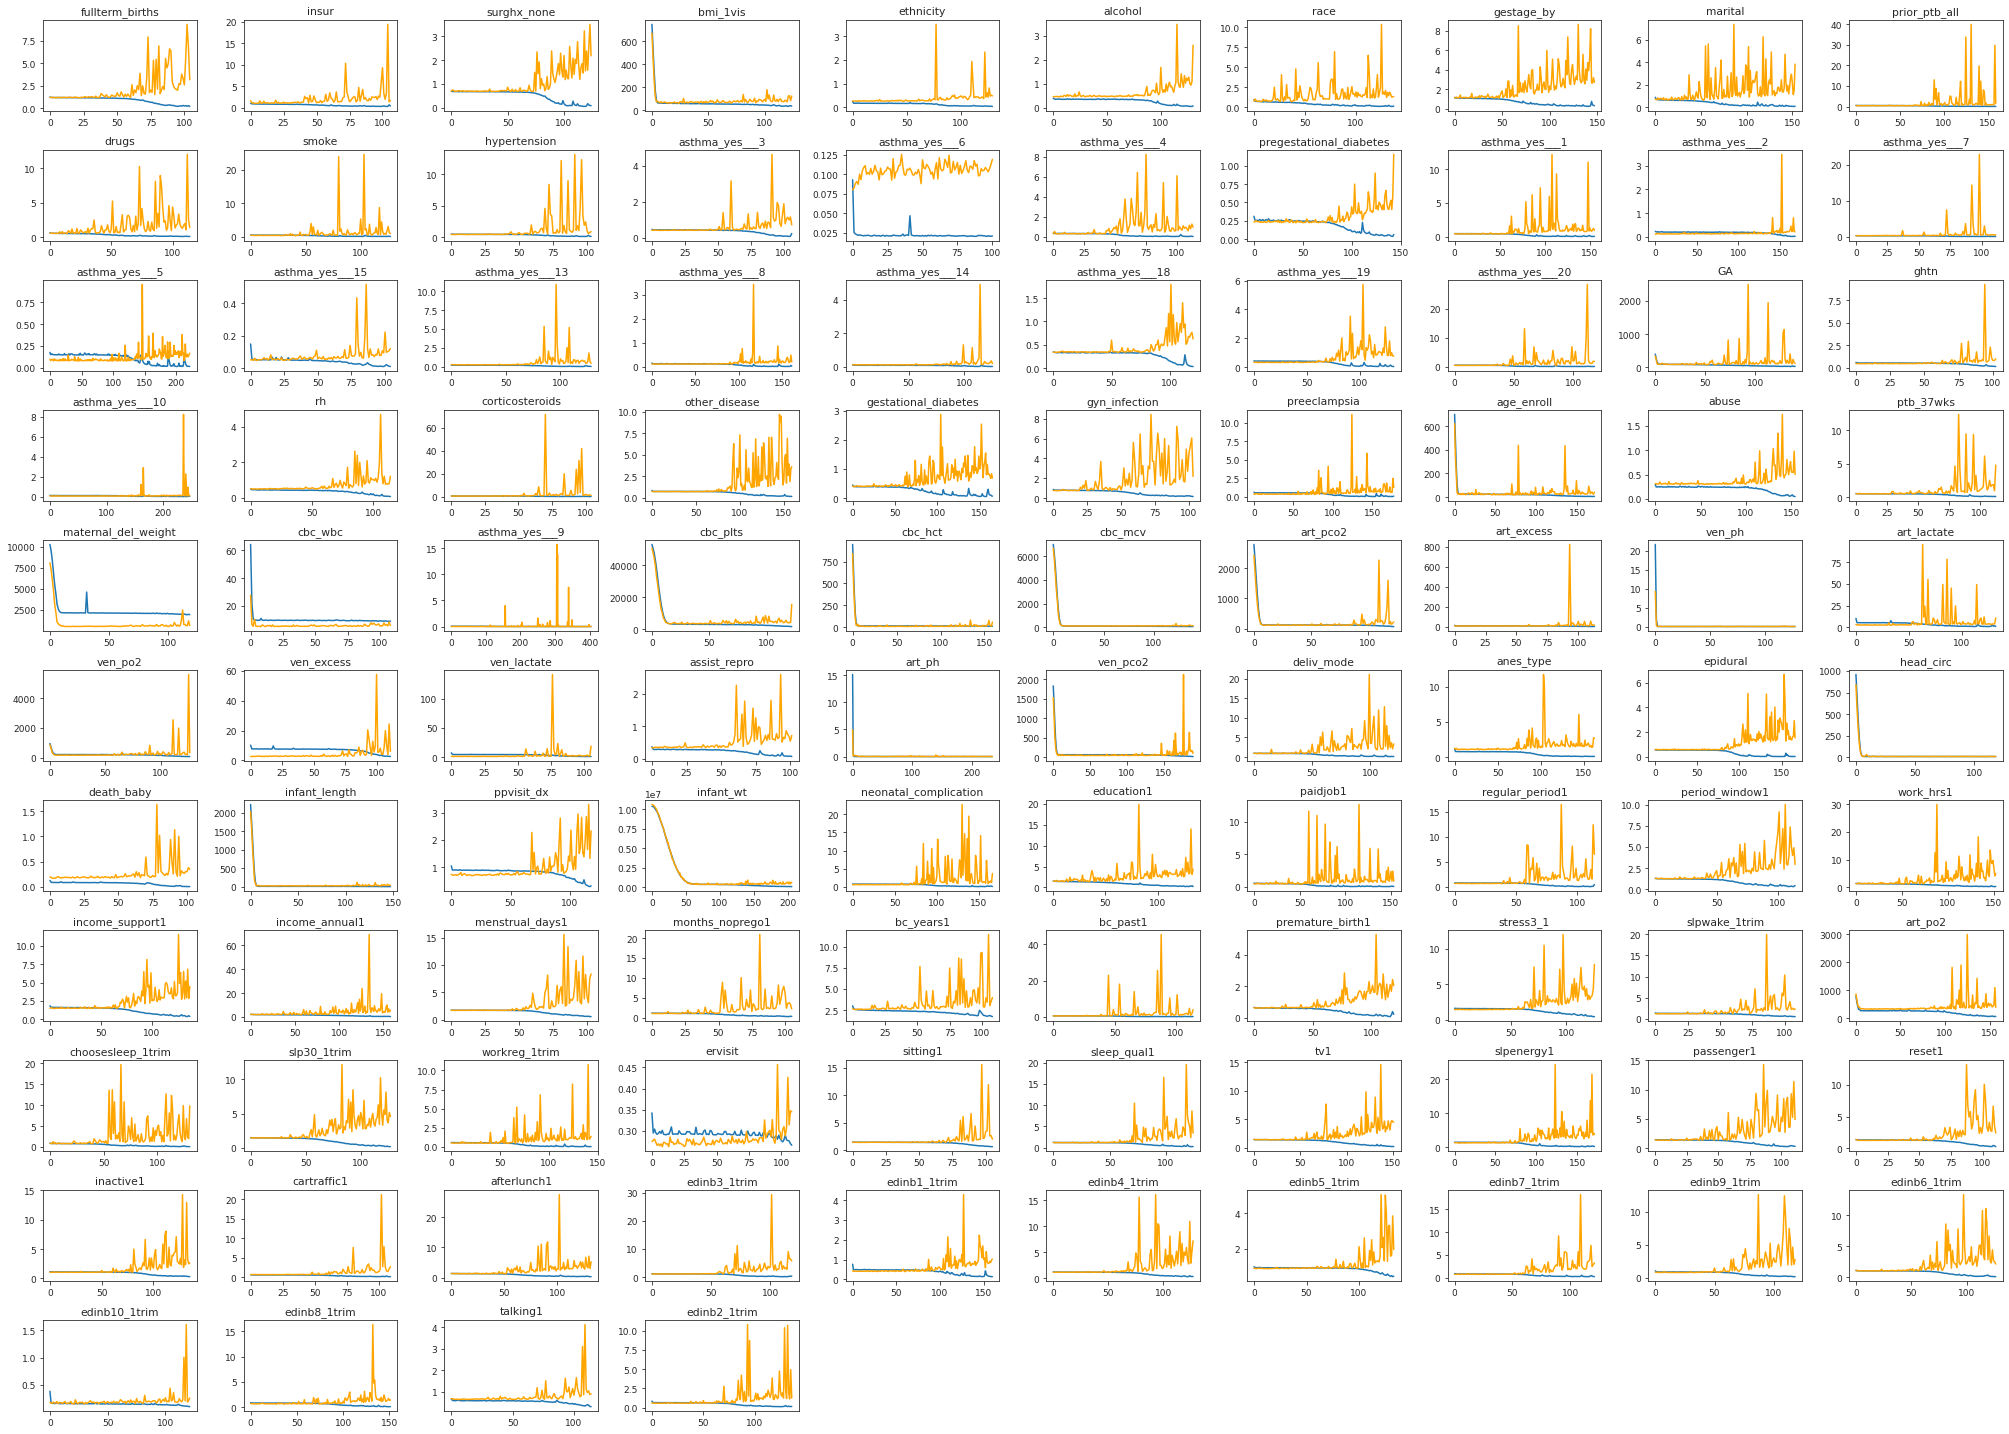

In [36]:
chk_all_training(out_file='/home/ngr4/project/wearables/results/IT_allmd_losses.png')

## Class imbalance

Visualize the frequency of each class in the data set, plot the label on top

In [37]:
md = data['Y_train']
md = md.loc[:, [i for i in md.columns if i not in ['record_id', 'pid']]]

In [82]:
def chk_category_freq(md, out_file):
    out = {} # format col: (names, values)
    def names_values(md, col, as_proportion=True):
        out = md[col].value_counts().to_dict()
        if as_proportion:
            for k,v in out.items():
                out[k] = v / md.shape[0]
        return list(out.keys()), list(out.values())
    
    fig = plt.figure(figsize=(30, 10))
    counter = 0
    for j, col in enumerate(md.columns):
        if md[col].dtype == object:
            y, x = names_values(md, col)
            out[col] = (y, x) # (names, values)
            ax = fig.add_subplot(7, 12, counter+1)
            for i in range(len(x)):
                ax.plot([0, x[i]], [y[i], y[i]], '--', color=sns.color_palette('deep', 100)[i])
            ax.scatter(x, y, c=sns.color_palette('deep', 100)[:len(x)])
            ax.set_yticklabels('')
            ax.plot([1/len(x), 1/len(x)], [ax.get_ylim()[0], ax.get_ylim()[1]], 'k--', alpha=0.5)
            ax.set_title(col)
            counter += 1
        fig.tight_layout()
    if out_file is not None:
        fig.savefig(out_file, bbox_inches='tight', dpi=300)
    return out

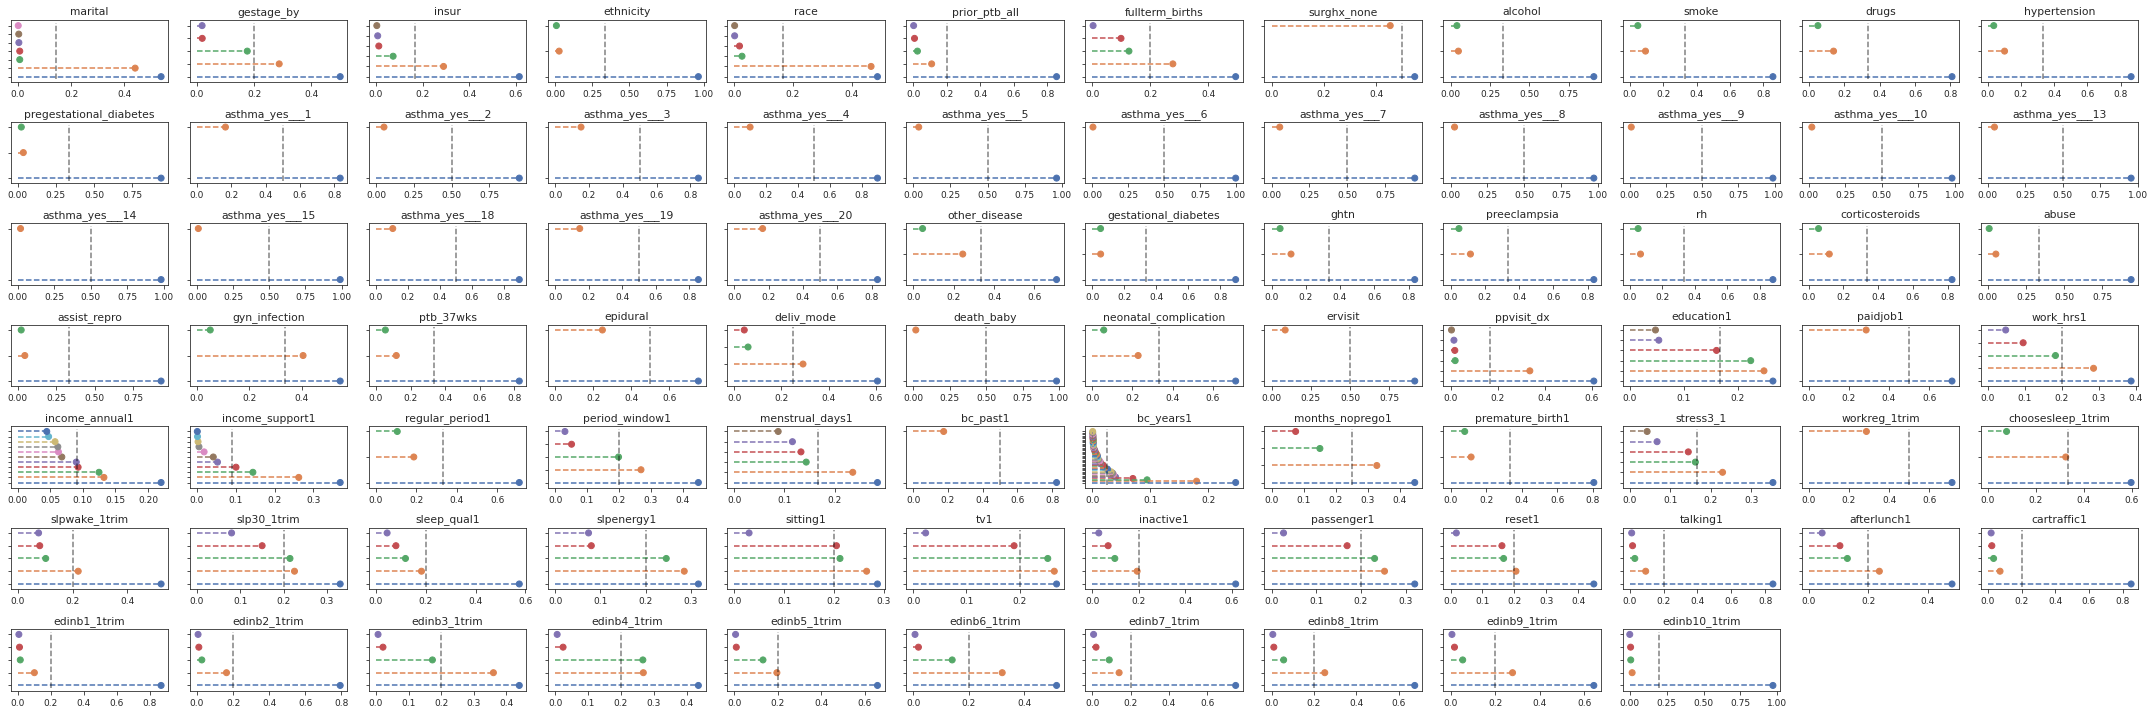

In [83]:
classfreqs = chk_category_freq(md, out_file='/home/ngr4/project/wearables/results/IT_catmd_classfreq.png')